In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
train_V1 = pd.read_csv("TrainData.csv")
train_V1['sex'] = train_V1['sex'].map({'male': 1, 'female': 0})
train_V1.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,station
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
5,0,3,1,NaN,0,0,8.4583,Q
6,0,1,1,54.0,0,0,51.8625,S
7,0,3,1,2.0,3,1,21.0750,S
8,1,3,0,27.0,0,2,11.1333,S
9,1,2,0,14.0,1,0,30.0708,C


In [3]:
train_V1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   station   889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [4]:
train_V1.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
station       2
dtype: int64

 Question 1 -Clean the data and remove any unwanted records. How many records do you have now?

In [5]:
train_V2 = train_V1.dropna()

In [6]:
train_V2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 50.1+ KB


Out of 890 records, After Cleaning we have 712 records.

Question 2. The train picked most passengers from which station ?

In [7]:
train_V1.groupby(['station'])['station'].count()

station
C    168
Q     77
S    644
Name: station, dtype: int64

The train picked most passengers from 'S' station , the count is 644.

Question 3.  basic data exploration (e.g. using commands as head( ), info( ), describe( ), nunique( ).Which variables will you NOT select?

In [8]:
train_V2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   station   712 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 50.1+ KB


In [9]:
train_V2.head()

,survived,pclass,sex,age,sibsp,parch,fare,station
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [10]:
train_V2.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [11]:
train_V2.nunique()

survived      2
pclass        3
sex           2
age          88
sibsp         6
parch         7
fare        219
station       3
dtype: int64

In [12]:
train_V2.groupby(['sex'])['sex'].count()

sex
0    259
1    453
Name: sex, dtype: int64

In [13]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

In [14]:
station_ohe = ohe.fit_transform(train_V2[['station']])

In [15]:
train_V2 = pd.concat([train_V2, station_ohe], axis = 1).drop(columns = ['station'])

In [16]:
train_V2.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,station_C,station_Q,station_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [17]:
corr_matrix = train_V2.corr(numeric_only = True).round(2)
corr_matrix

,survived,pclass,sex,age,sibsp,parch,fare,station_C,station_Q,station_S
survived,1.00,-0.36,-0.54,-0.08,-0.02,0.10,0.27,0.20,-0.05,-0.16
pclass,-0.36,1.00,0.15,-0.37,0.07,0.02,-0.55,-0.28,0.13,0.20
sex,-0.54,0.15,1.00,0.10,-0.11,-0.25,-0.18,-0.10,-0.03,0.11
age,-0.08,-0.37,0.10,1.00,-0.31,-0.19,0.09,0.04,-0.02,-0.03
sibsp,-0.02,0.07,-0.11,-0.31,1.00,0.38,0.14,-0.05,0.05,0.02
parch,0.10,0.02,-0.25,-0.19,0.38,1.00,0.21,-0.01,-0.01,0.01
fare,0.27,-0.55,-0.18,0.09,0.14,0.21,1.00,0.30,-0.06,-0.25
station_C,0.20,-0.28,-0.10,0.04,-0.05,-0.01,0.30,1.00,-0.10,-0.88
station_Q,-0.05,0.13,-0.03,-0.02,0.05,-0.01,-0.06,-0.10,1.00,-0.38
station_S,-0.16,0.20,0.11,-0.03,0.02,0.01,-0.25,-0.88,-0.38,1.00


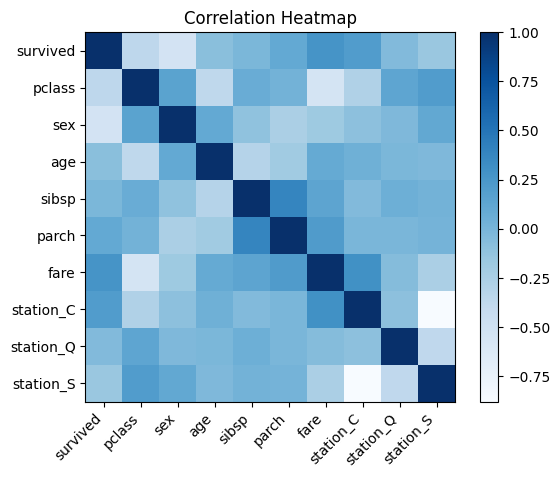

In [18]:
plt.imshow(corr_matrix, cmap = 'Blues')

plt.colorbar()

variables = []
for i in corr_matrix.columns:
  variables.append(i)

plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

plt.title("Correlation Heatmap")
plt.show()

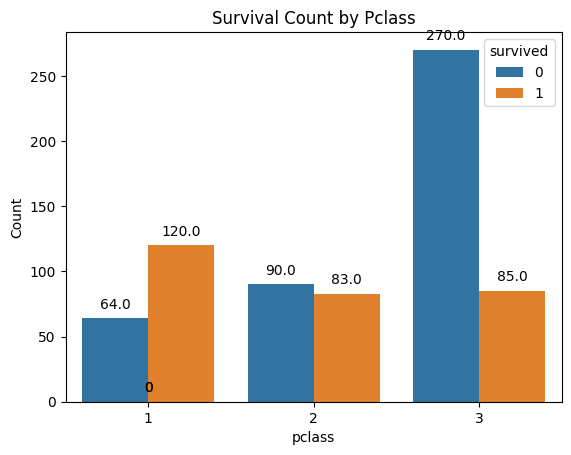

In [22]:
import seaborn as sns
class_plot = sns.countplot(data=train_V2, x='pclass', hue='survived')
plt.title('Survival Count by Pclass')
plt.xlabel('pclass')
plt.ylabel('Count')
for p in class_plot.patches:
    class_plot.annotate(f'{p.get_height()}',\
                (p.get_x() + p.get_width() / 2.,\
                 p.get_height()), ha='center',\
                va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

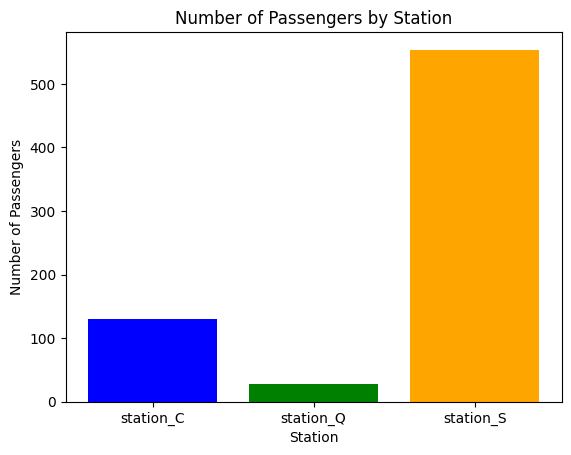

In [23]:
station_counts = train_V2[['station_C', 'station_Q', 'station_S']].sum()
colors = ['blue', 'green', 'orange']
plt.bar(station_counts.index, station_counts.values,color= colors)
plt.title('Number of Passengers by Station')
plt.xlabel('Station')
plt.ylabel('Number of Passengers')
plt.show()

In [24]:
train_V3 = train_V2.drop(['sibsp', 'station_Q'], axis = 1)

In [25]:
train_V3.head(5)

,survived,pclass,sex,age,parch,fare,station_C,station_S
0,0,3,1,22.0,0,7.2500,0.0,1.0
1,1,1,0,38.0,0,71.2833,1.0,0.0
2,1,3,0,26.0,0,7.9250,0.0,1.0
3,1,1,0,35.0,0,53.1000,0.0,1.0
4,0,3,1,35.0,0,8.0500,0.0,1.0


In [26]:
print("A correlation coefficient of -0.02 between the sibsp variable and the dependent variable (Survived) indicates a very weak negative linear relationship. Similarly, a correlation coefficient of -0.05 between the Station_Q variable and Survived also suggests a very weak negative linear relationship.Hence,these two variables are omitted for further analysis. (sibsp & station_Q)")

A correlation coefficient of -0.02 between the sibsp variable and the dependent variable (Survived) indicates a very weak negative linear relationship. Similarly, a correlation coefficient of -0.05 between the Station_Q variable and Survived also suggests a very weak negative linear relationship.Hence,these two variables are omitted for further analysis. (sibsp & station_Q)


Question 4. Are there any outliers in the data? If yes, treat them.

In [27]:
train_V3.describe()

,survived,pclass,sex,age,parch,fare,station_C,station_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.432584,34.567251,0.182584,0.778090
std,0.491139,0.836854,0.481420,14.492933,0.854181,52.938648,0.386597,0.415823
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,8.050000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,15.645850,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,33.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,6.000000,512.329200,1.000000,1.000000


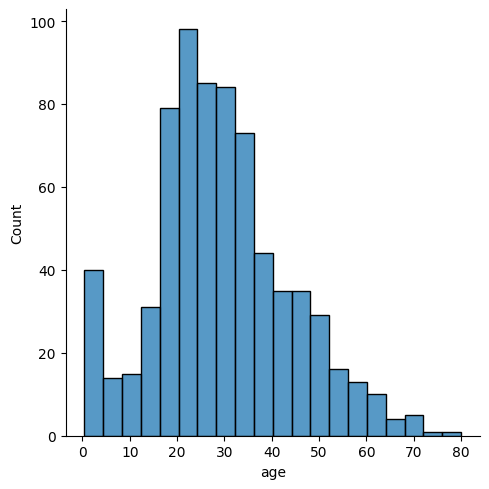

In [28]:
import seaborn as sns
sns.displot(train_V3['age'])
#sns.displot(train_V3['parch'])
#sns.displot(train_V3['fare'])

<Axes: ylabel='fare'>

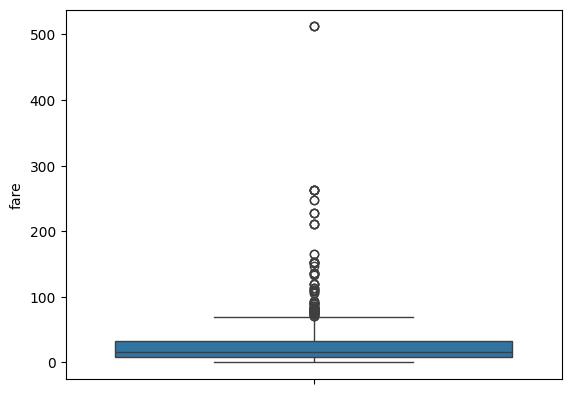

In [29]:
sns.boxplot(train_V3['fare'])

from scipy import stats
z_scores = stats.zscore(train_V3.select_dtypes(include=['int', 'float']))
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
train_V4 = train_V3[~outliers]
print("Data with outliers removed:")
print(outliers)


In [30]:
_mean = train_V3.mean()
_std_dev = train_V3.std()

z_scores = (train_V3 - _mean) / _std_dev
threshold = 3
outliers = np.abs(z_scores) > threshold

train_V4 = train_V3[~outliers.any(axis=1)]

print("Data with outliers removed:")
print(outliers)

Data with outliers removed:
     survived  pclass    sex    age  parch   fare  station_C  station_S
0       False   False  False  False  False  False      False      False
1       False   False  False  False  False  False      False      False
2       False   False  False  False  False  False      False      False
3       False   False  False  False  False  False      False      False
4       False   False  False  False  False  False      False      False
..        ...     ...    ...    ...    ...    ...        ...        ...
885     False   False  False  False   True  False      False      False
886     False   False  False  False  False  False      False      False
887     False   False  False  False  False  False      False      False
889     False   False  False  False  False  False      False      False
890     False   False  False  False  False  False      False      False

[712 rows x 8 columns]


Yes,there are outliers in the data .Hence treated .

Question 5.Partition the data into a training set (with 70% of the observations), and testing set (with 30% of the 
observations) using the random state of 12345 for cross validation. 

KNN Accuracy: 0.6372549019607843
Logistic Regression Accuracy: 0.7549019607843137
Decision Tree Accuracy: 0.7696078431372549

Training and Testing KNN:
Train Accuracy with KNN: 0.7911392405063291
Test Accuracy with KNN: 0.6372549019607843


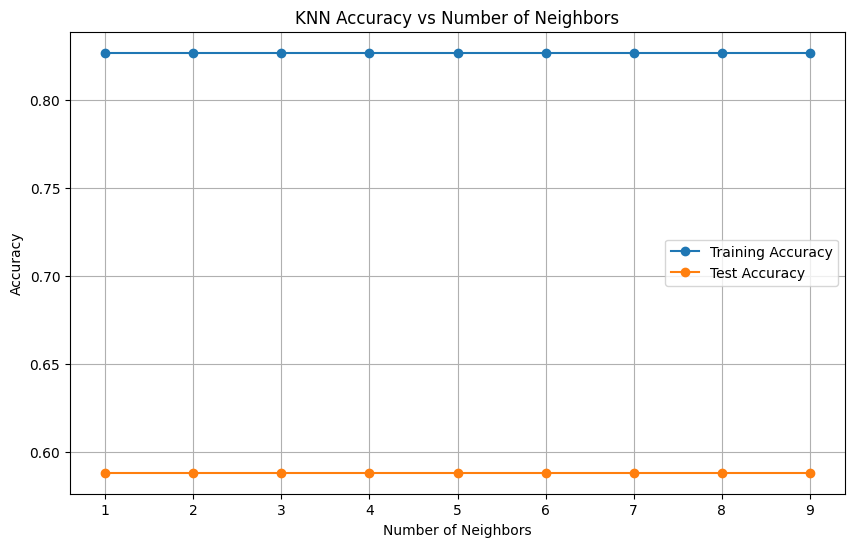


Training and Testing Decision Tree:
Train Accuracy with Decision Tree: 0.989451476793249
Test Accuracy with Decision Tree: 0.7794117647058824


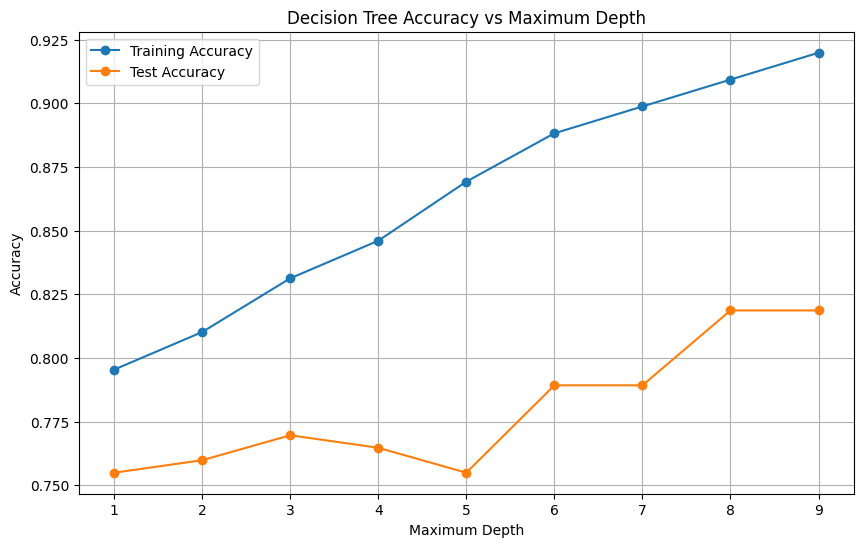


Model Comparison:
The best model for classifying the data is: Decision Tree with accuracy 0.7696078431372549
Accuracy of KNN model: 0.5882352941176471
Accuracy of Logistic Regression model: 0.7549019607843137
The best model for classifying the data is: Logistic Regression with accuracy: 0.7549019607843137


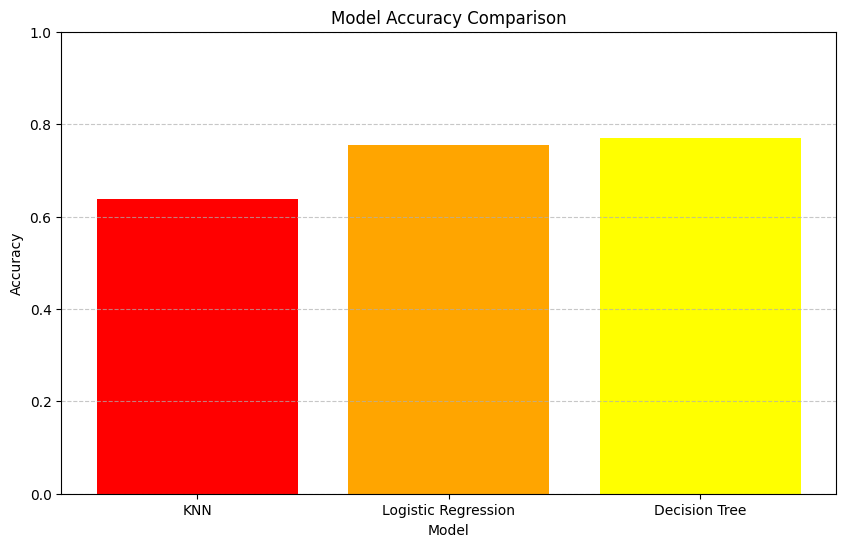

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt

class ModelManager:
    def __init__(self):
        self.models = {}

    def add_model(self, name, model):
        self.models[name] = model

    def train_models(self, X_train, y_train):
        for name, model in self.models.items():
            model.fit(X_train, y_train)

    def test_models(self, X_test, y_test):
        accuracies = {}
        for name, model in self.models.items():
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            accuracies[name] = accuracy
            print(f"{name} Accuracy: {accuracy}")
        return accuracies

    def train_knn(self, X_train, y_train, X_test, y_test):
        knn = self.models['KNN']
        knn.fit(X_train, y_train)

        train_accuracy = knn.score(X_train, y_train)
        test_accuracy = knn.score(X_test, y_test)
        
        print(f"Train Accuracy with KNN: {train_accuracy}")
        print(f"Test Accuracy with KNN: {test_accuracy}")

        neighbors = range(1, 10)
        
        train_accuracy = []
        test_accuracy = []
        
        for n in neighbors:
            knn.n_neighbors = 2
            knn.fit(X_train, y_train)
            train_accuracy.append(knn.score(X_train, y_train))
            test_accuracy.append(knn.score(X_test, y_test))

        plt.figure(figsize=(10, 6))
        plt.plot(neighbors, train_accuracy, label="Training Accuracy", marker='o')
        plt.plot(neighbors, test_accuracy, label="Test Accuracy", marker='o')
        plt.title("KNN Accuracy vs Number of Neighbors")
        plt.xlabel("Number of Neighbors")
        plt.ylabel("Accuracy")
        plt.xticks(neighbors)
        plt.legend()
        plt.grid()
        plt.show()

    def train_logistic_regression(self, X_train, y_train, X_test, y_test):
        log_reg = self.models['Logistic Regression']
        log_reg.fit(X_train, y_train)

        train_accuracy = log_reg.score(X_train, y_train)
        test_accuracy = log_reg.score(X_test, y_test)

        print(f"Train Accuracy with Logistic Regression: {train_accuracy}")
        print(f"Test Accuracy with Logistic Regression: {test_accuracy}")

    def train_decision_tree(self, X_train, y_train, X_test, y_test):
        decision_tree = self.models['Decision Tree']
        decision_tree.fit(X_train, y_train)

        train_accuracy = decision_tree.score(X_train, y_train)
        test_accuracy = decision_tree.score(X_test, y_test)

        print(f"Train Accuracy with Decision Tree: {train_accuracy}")
        print(f"Test Accuracy with Decision Tree: {test_accuracy}")

        depths = range(1, 10)
        
        train_accuracy = []
        test_accuracy = []
        
        for depth in depths:
            decision_tree.max_depth = depth
            decision_tree.fit(X_train, y_train)
            train_accuracy.append(decision_tree.score(X_train, y_train))
            test_accuracy.append(decision_tree.score(X_test, y_test))
        
        # Plotting the graph
        plt.figure(figsize=(10, 6))
        plt.plot(depths, train_accuracy, label="Training Accuracy", marker='o')
        plt.plot(depths, test_accuracy, label="Test Accuracy", marker='o')
        plt.title("Decision Tree Accuracy vs Maximum Depth")
        plt.xlabel("Maximum Depth")
        plt.ylabel("Accuracy")
        plt.xticks(depths)
        plt.legend()
        plt.grid()
        plt.show()


X = train_V4.drop(['survived'], axis=1)
y = train_V4['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

knn = KNeighborsClassifier()
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()

manager = ModelManager()
manager.add_model("KNN", knn)
manager.add_model("Logistic Regression", log_reg)
manager.add_model("Decision Tree", decision_tree)

manager.train_models(X_train, y_train)

accuracies = manager.test_models(X_test, y_test)

print("\nTraining and Testing KNN:")
manager.train_knn(X_train, y_train, X_test, y_test)

print("\nTraining and Testing Decision Tree:")
manager.train_decision_tree(X_train, y_train, X_test, y_test)

print("\nModel Comparison:")
best_model = max(accuracies, key=accuracies.get)
print(f"The best model for classifying the data is: {best_model} with accuracy {accuracies[best_model]}")

knn_predictions = knn.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

print("Accuracy of KNN model:", knn_accuracy)
print("Accuracy of Logistic Regression model:", log_reg_accuracy)

if knn_accuracy > log_reg_accuracy:
    best_model = "KNN"
    best_accuracy = knn_accuracy
else:
    best_model = "Logistic Regression"
    best_accuracy = log_reg_accuracy

print("The best model for classifying the data is:", best_model, "with accuracy:", best_accuracy)

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['red', 'orange', 'yellow'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

    

BEST value of K is 2

FIGURE 1: BOX PLOT OF FARE VS SURVIVED

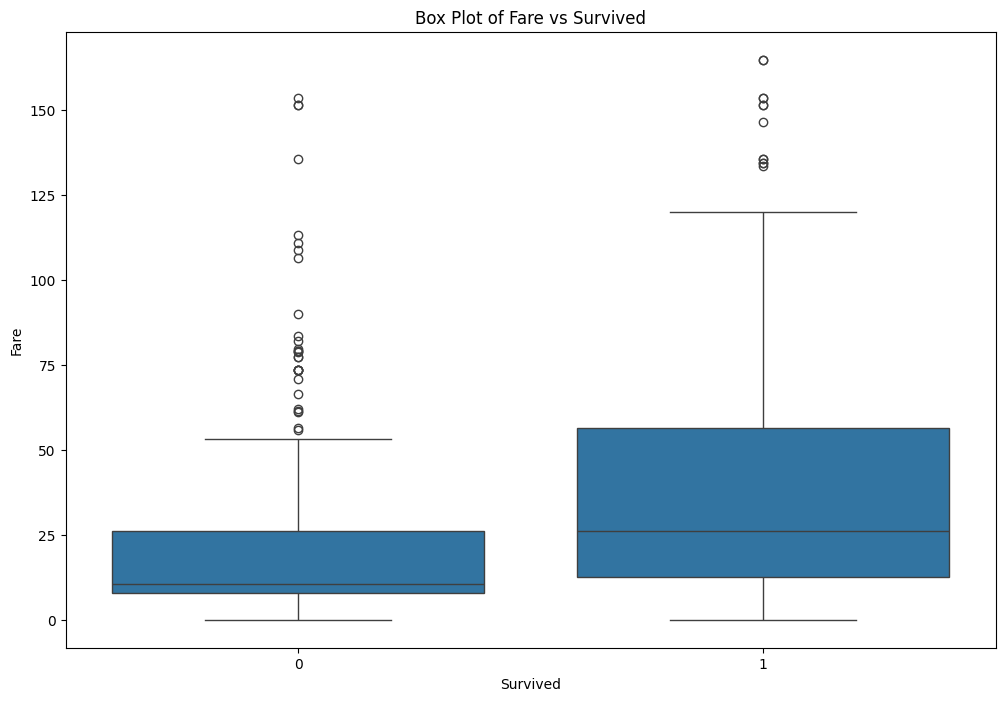

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='survived', y='fare', data=train_V4) 
#survived  pclass    sex    age  parch   fare  station_C  station_S
plt.title('Box Plot of Fare vs Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()